In [25]:
import numpy 
from math import * 
from scipy import integrate
from matplotlib import pyplot 
%matplotlib inline

In [26]:
# plot NACA 2510 airfoil
N_panels = 10                    # number of panels desired

T = 0.1
H = 0.02
c = 1
a = c/4
r = (0.25+T/(3*sqrt(3)))*c                      # circle radius
zeta_c = -4*a/(3*sqrt(3))*T + 1j*2*a*H        # circle center
theta = numpy.linspace(0, 2*pi, N_panels+1)   # theta endpoints of panels
zeta = r*numpy.exp(1j*theta)                       # endpoints of circle surface panels
z_ends = (zeta+zeta_c) + a**2/(zeta+zeta_c)        # endpoints of airfoil surface panels
#x_ends,  y_ends = z_ends.real, z_ends.imag

xm = z_ends.real
ym = z_ends.imag

#xm = xm[::-1]
#ym = ym[::-1]




In [29]:
Nfpanels = 10                    # number of panels desired

Tf = 0.1
Hf = 0.02
cf = 0.2
af = cf/4
rf = (0.25+Tf/(3*sqrt(3)))*c                              # circle radius
zeta_cf = -4*a/(3*sqrt(3))*Tf + 1j*2*a*Hf               # circle center
thetaf = numpy.linspace(0, 2*pi, Nfpanels+1)            # theta endpoints of panels
zetaf = rf*numpy.exp(1j*thetaf)                         # endpoints of circle surface panels
z_endsf = (zetaf+zeta_cf) + a**2/(zetaf+zeta_cf)        # endpoints of airfoil surface panels
#xfends,  yfends = z_ends.real, z_ends.imag


xf = z_endsf.real +0.6
yf = z_endsf.imag-0.05



(-0.60000000000000009, 1.2, -0.080000000000000002, 0.080000000000000002)

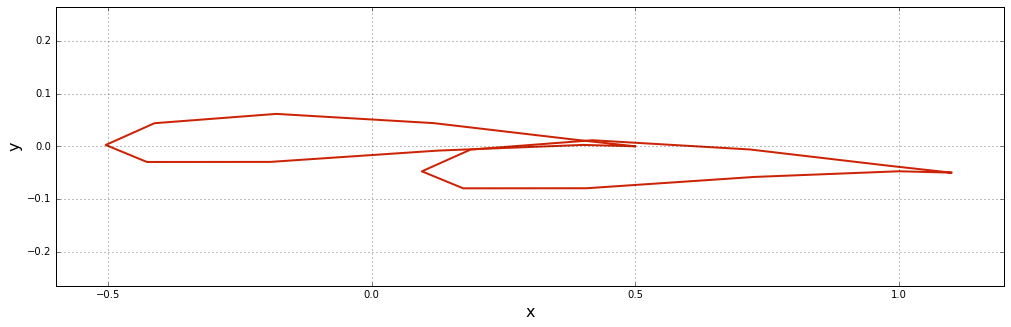

In [30]:
# #transforming into Joukowsky 
pyplot.figure(figsize=(17,5))

pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)

pyplot.plot(xm, ym, color='#CD2305', linestyle='-', linewidth=2)
pyplot.plot(xf, yf, color='#CD2305', linestyle='-', linewidth=2)
pyplot.axis("equal")

# flap angle
def flap_theta(xf, yf, xc, yc, thetaf):
    
    thetaf = theta * pi/180
    
    xf = xf + xc
    yf = yf + yc
    
    #r = sqrt(xf**2+yf**2)
    xf = r*cos(theta)
    yf = r*sin(theta)
    
    xf1 = xf+xc
    yf1 = yf+yc
    
    return xf1, yf1

xc = 0.05
yc = 0.01
theta = 20

xf, yf = flap_theta(xf, yf, xc, yc, theta)

pyplot.figure(figsize=(17,5))
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.plot(xf, yf, color='#CD2305', linestyle='-', linewidth=2)
pyplot.axis("equal")


In [9]:
class Panel:

    def __init__(self, xa, ya, xb, yb):

        # End Points
        self.xa, self.ya = xa, ya
        self.xb, self.yb = xb, yb
        
        # Center Point
        self.xc, self.yc = (xa+xb)/2, (ya+yb)/2       
        
        # Length
        self.length = sqrt((xb-xa)**2+(yb-ya)**2)
        
        # Orientation
        if xb-xa <= 0.:
            self.beta = acos((yb-ya)/self.length)
        elif xb-xa > 0.:
            self.beta = pi + acos(-(yb-ya)/self.length)
                
                               
        # Normal and Tangental Coponents
        self.n= [ cos(self.beta), sin(self.beta)]
        self.t= [-sin(self.beta), cos(self.beta)] 
        
        # Strength  
        self.kappa = 1.0 
        
        # Pressure Coeffecient          
        self.cp = 0.
        
        # Tangent Velocity      
        self.vt = 0.

In [10]:
Uinf = 1.0                    # free-stream velocity
alpha = 2.0*pi/180            # angle of attack

In [11]:
#Flap
Nfpanels = 5
T  = 0.1
c = 0.2 
H = 0.0
a = c/4
theta = numpy.linspace(0, 2*pi, Nfpanels+1) 
Zeta_c = -4*a/(3*sqrt(3))*T+1j*2*H
r_s = ((1/4)+(T/(3*sqrt(3))))*c
 
Zeta = (r_s)*numpy.exp(1j*(theta))

Jf = (Zeta+Zeta_c) + a**2/(Zeta+Zeta_c)

xf = Jf.real+0.6
yf = Jf.imag-0.05



# define the panels for flap

xf = numpy.delete(xf,[1,Nfpanels-1])       # delete 2nd and 2nd to last points to merge panels
yf = numpy.delete(yf,[1,Nfpanels-1])
Nfpanels = Nfpanels - 2

panelsf = numpy.empty(Nfpanels+1, dtype=object)
for i in range(Nfpanels):
    panelsf[i] = Panel(xf[i], yf[i], xf[i+1], yf[i+1])
panelsf[-1] = Panel(xf[0], yf[0], xf[0]+1000, yf[0])

NameError: name 'x_ends' is not defined

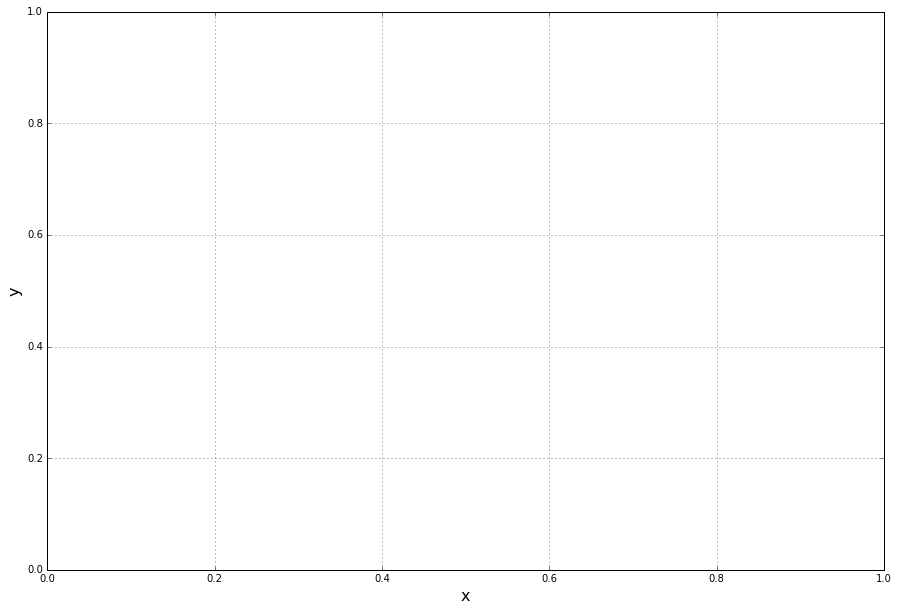

In [12]:
# plot the panels
#size = 6
pyplot.figure(figsize=(15, 10))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x_ends, y_ends, color='#CD2305', linestyle='-', linewidth=2)
pyplot.plot(xf, yf, color='#CD2305', linestyle='-', linewidth=2)
pyplot.scatter([p.xa for p in panels], [p.ya for p in panels], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panels], [p.yc for p in panels], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panels], [p.yc for p in panels], [p.n[0] for p in panels], [p.n[1] for p in panels],
              scale=25, width=0.005)

pyplot.scatter([p.xa for p in panelsf], [p.ya for p in panelsf], color='#CD2305', s=40)
pyplot.scatter([p.xc for p in panelsf], [p.yc for p in panelsf], color='k', marker='x', s=40, zorder=3)
pyplot.quiver([p.xc for p in panelsf], [p.yc for p in panelsf], [p.n[0] for p in panelsf], [p.n[1] for p in panelsf],
              scale=50, width=0.005)
pyplot.legend(['panels', 'end-points', 'center-points'], loc='best', prop={'size':16})
pyplot.xlim(-0.75, 0.75)
pyplot.ylim(-0.5, 0.5);

In [ ]:
def get_doublet_panel_velocity(p,x,y):
    """Evaluates the velocity components induced at coordinates (x,y) by a panel p.
    
    Arguments
    ---------
    p -- panel from which the velocity is induced
    x -- x-coordinate in global frame
    y -- y-coordinate in global frame
    
    Returns
    -------
    (u,v)-components of velocity at (x,y)
    """
    
    x_p =  sin(p.beta)*(x-p.xb) - cos(p.beta)*(y-p.yb)
    y_p =  cos(p.beta)*(x-p.xb) + sin(p.beta)*(y-p.yb)
    
    u_p = -p.kappa/(2*pi)*(y_p/(x_p**2+y_p**2) - y_p/((x_p-p.length)**2+y_p**2))
    v_p =  p.kappa/(2*pi)*(x_p/(x_p**2+y_p**2) - (x_p-p.length)/((x_p-p.length)**2+y_p**2))
    
    u =  sin(p.beta)*u_p + cos(p.beta)*v_p
    v = -cos(p.beta)*u_p + sin(p.beta)*v_p
    
    return u, v

In [ ]:
Nt = numpy.concatenate((panels,panelsf))
No = 2*(N_panels+1)
print (No)

In [ ]:
# compute the influence coefficient matrix
def source_matrix(Nt):
    No = 2*(N_panels+1)
    A = numpy.zeros((No, No), dtype=float)
    for i, p_i in enumerate(Nt[0:N_panels]):
        for j, p_j in enumerate(Nt):
            A[i,j] = numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.n)
            if i == j:
                A[i,j] *= 1.001
    A[-1,0] = -1
    A[-1,-2] = 1
    A[-1,-1] = -1
    
    return A



In [ ]:
# compute the RHS of the linear system
def build_rhs(panels, Uinf):
    #No = 2*(N_panels+1)
    b = numpy.zeros((No, 1), dtype=float)
    for i, p_i in enumerate(Nt[0:N_panels]):
        b[i] = -numpy.dot(numpy.array([Uinf*cos(alpha), Uinf*sin(alpha)]), p_i.n)
    
    return b

In [ ]:
# solves the linear system
kappa = numpy.linalg.solve(source_matrix(Nt),build_rhs(panels, Uinf))

for i, panel in enumerate(Nt):
    panel.kappa = float(kappa[i])

In [ ]:
for i, p_i in enumerate(Nt[0:No]):
    vt = numpy.array([0])
    for j, p_j in enumerate(Nt):
        if i != j:
            vt = vt + numpy.dot(get_doublet_panel_velocity(p_j, p_i.xc, p_i.yc), p_i.t)
    if i == 0:
        R = sqrt((Nt[1].xc-Nt[0].xc)**2 + (Nt[1].yc-Nt[0].yc)**2)
        vt = vt - 0.5*(Nt[1].kappa-Nt[0].kappa)/R
    elif i == No-1:
        R = sqrt((Nt[No-1].xc-Nt[No-2].xc)**2 + (Nt[No-1].yc-Nt[No-2].yc)**2)
        vt = vt - 0.5*(Nt[No-1].kappa-Nt[No-2].kappa)/R
    else:
        R = sqrt((Nt[i+1].xc-Nt[i-1].xc)**2 + (Nt[i+1].yc-Nt[i-1].yc)**2)
        vt = vt - 0.5*(Nt[i+1].kappa-Nt[i-1].kappa)/R
    vt = vt + numpy.dot(numpy.array([Uinf*cos(alpha), Uinf*sin(alpha)]), p_i.t)
    p_i.vt = float(vt)
    p_i.cp = 1.0 - (p_i.vt/Uinf)**2

In [ ]:
# create surface of airfoil for analytical solution
theta = numpy.linspace(0.01, 2*pi-0.01, 41)      # theta coordinates
zeta = r*numpy.exp(1j*theta)                          # circle coordinates
z = (zeta+zeta_c) + a**2/(zeta+zeta_c)                # airfoil coordinates

# flow parameters
kappa = 2*pi*Uinf*r**2                   # doublet strength for circle with radius r
Gam = 4*pi*r*Uinf*numpy.sin(alpha+2*H)      # vortex strength

# compute the complex velocity on the surface
w = Uinf - kappa/(2*pi)/zeta**2 + 1j*Gam/(2*pi)/zeta
zeta = zeta*numpy.exp(1j*alpha)

In [ ]:
# Joukowski transformation
w = w/(1 - a**2/(zeta+zeta_c)**2)
#cp_analytical = 1 - numpy.abs(w)**2/Uinf**2

In [ ]:
# plots the surface pressure coefficient
pyplot.figure(figsize=(10, 6))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('$C_p$', fontsize=16)
#pyplot.plot(z.real, cp_analytical, color='b', linestyle='-', linewidth=1, zorder=1)
pyplot.scatter([p.xc for p in Nt[0:No]], [p.cp for p in Nt[0:No]], color='#CD2305', s=40, zorder=2)
pyplot.title('Number of panels : %d' % No, fontsize=16)
#pyplot.legend(['analytical', 'source panel method'], loc='best', prop={'size':16})
pyplot.xlim(-0.6, 0.6)
pyplot.ylim(-1, 1.5)
pyplot.gca().invert_yaxis();